# MLServer Runtime Demo

In this demo, you train a simple model to recognize hand-written digits and serve the model with the [Seldon MLServer runtime](https://github.com/SeldonIO/MLServer).

Train the model with the Scikit-learn library.

In [1]:
# Original source code and more details can be found in:
# https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# The digits dataset
digits = datasets.load_digits()

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

SVC(gamma=0.001)


Export the model with the Joblib library.
Joblib is a popular option for model persistence in Scikit-learn.

Note that exporting the model with Joblib serializes the model into a file format different from ONNX.
OpenVino does not support the joblib format, so you must serve this model with a different runtime.

In [2]:
import joblib

model_file_name = "mnist-svm.joblib"
joblib.dump(classifier, model_file_name)

['mnist-svm.joblib']

In the RHODS dashboard, add the MLServer runtime in the `Settings > Serving runtimes` section.
Add the contents of the `ml-server-runtime.yaml` manifest to add the runtime.

After you have added the MLServer runtime, return to your data science project.
Add a new `MLServer` model server by selecting the `MLServer` serving runtime in the model server creation form.

Next, upload the joblib model file to your S3 instance and create a data connection to connect to that instance.

Finally, deploy the model by using the `sklearn` model framework and your S3 data connection.

Use the following cells to test your deployed model:

<Figure size 640x480 with 0 Axes>

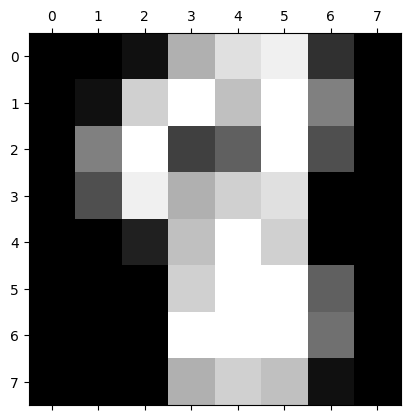

In [35]:
import matplotlib.pyplot as plt

x_0 = X_test[0:1]

plt.gray()
plt.matshow(x_0.reshape((8, 8)))

In [32]:
import requests

inference_request = {
    "inputs": [
        {
          "name": "predict",
          "shape": x_0.shape,
          "datatype": "FP32",
          "data": x_0.tolist()
        }
    ]
}

endpoint = "https://YOUR-MODEL-INFENRENCE-URL"
response = requests.post(endpoint, json=inference_request)

result = response.json()
result

{'model_name': 'digits-model__isvc-16547a49a0',
 'outputs': [{'name': 'predict',
   'datatype': 'INT64',
   'shape': [1, 1],
   'parameters': {'content_type': 'np'},
   'data': [8]}]}

In [33]:
print("\nPredicted digit:", result["outputs"][0]["data"][0])


Predicted digit: 8
